## Odds explained graphically

**Raibatak Das - 2023-APR-15**

Julia code to produce plots showing relationship between risk and odds

In [1]:
using Plots, Plots.PlotMeasures, LaTeXStrings

Plot relationship with odds on a log scale

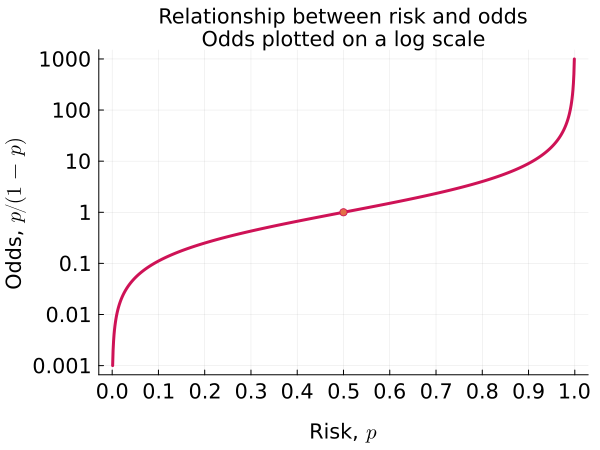

In [2]:
prob = range(start = 0.001, step = 0.001, stop = 0.999)
odds = @. prob/(1 - prob)
p = plot(prob, odds, label = "",
    lw = 3, linecolor = "#ce1256")
plot!(p, [0.5], [1], label = "",
    seriestype=:scatter, 
    msc = "#ce1256")
plot!(p,
    size = (600, 450),
    dpi = 150,
    title = "Relationship between risk and odds\nOdds plotted on a log scale",
    yscale = :log10,
    xaxis = ("\nRisk, " * L"$p$", 0:0.1:1),
    yaxis = ("Odds, " * L"$p/(1 - p)$"),
    yticks =  ([0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        ("0.001", "0.01", "0.1", "1", "10", "100", "1000")),
    tickfontsize = 14,
    labelfontsize = 14)

In [3]:
# Uncomment to same as png
# savefig("odds-vs-risk-plot-logy.png");

Add $y = x$ line

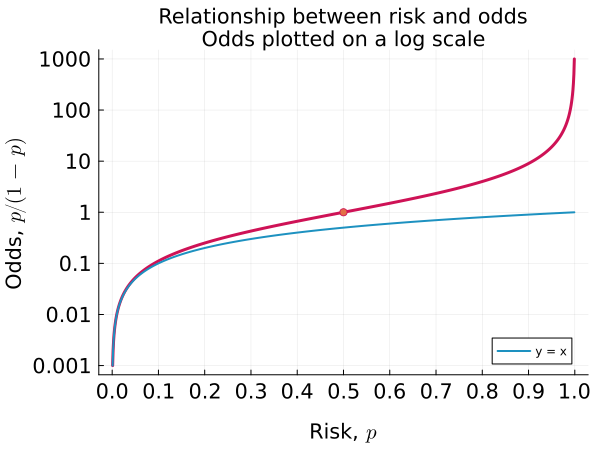

In [4]:
plot(p)
p = plot!(prob, prob, 
    lw = 2, lc = "#1d91c0",
    label = "y = x", 
    legend = :bottomright,
    title = "Relationship between risk and odds\nOdds plotted on a log scale")

In [5]:
# Uncomment to same as png
# savefig("odds-vs-risk-plot.png");

Replot with linear y scale

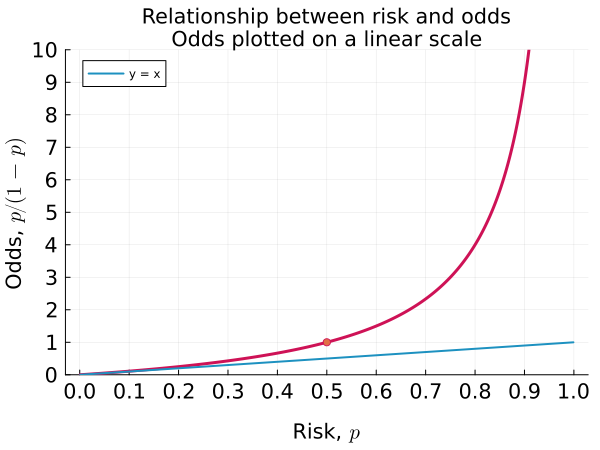

In [6]:
plot(p, yscale = :linear,
     yaxis = ([0, 10], 0:10),
     legend = :topleft,
     title = "Relationship between risk and odds\nOdds plotted on a linear scale")

In [7]:
# Uncomment to same as png
# savefig("odds-vs-risk-plot-liny.png");

Plot logistic function showing relationship between a continuous variable $x$ and the probability $p$ of a binary response:
$$ p(x) = \frac{1}{1 + \exp[-(a + b\cdot x)]} $$

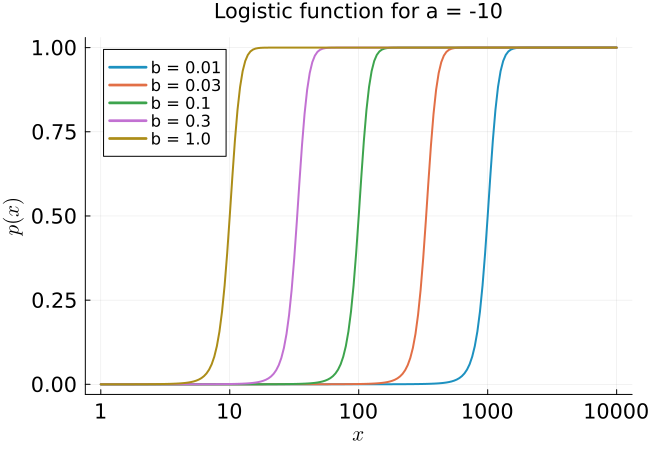

In [8]:
x = 10 .^ collect(range(-0, 4, 201));

a, b = -10, 0.01
prob = @. 1 / (1 + exp(-(a + b*x)))
p = plot(x, prob, label = "b = $b",
         lw = 2, lc = "#1d91c0")
for b = [0.03, 0.1, 0.3, 1]
    prob = @. 1 / (1 + exp(-(a + b*x)))
    plot!(x, prob, label = "b = $b",
      lw = 2)
end
plot!(size = (650, 450),
      dpi = 150,
      xscale = :log10,
      xaxis = L"$x$",
      yaxis = L"$p(x)$",
      xticks = ([0.1, 1, 10, 100, 1000, 10000],
                ["0.1", "1", "10", "100", "1000", "10000"]),
      topmargin = 10px,
      rightmargin = 10px,
      tickfontsize = 14,
      labelfontsize = 14, 
      legendfontsize = 11,
      legend = :topleft,
      title = "Logistic function for a = $a")

In [9]:
# Uncomment to same as png
# savefig("logistic-function-plot.png");